# 1° Preprocessing, recupération et formatage des données

In [ ]:
import numpy as np
#Fonction pour extraire les données d'entrainement ( ceux ayant une * devant)
def extract_train_set(filename):
  trainR = []
  with open(filename, "r") as f:
      lines = f.readlines()
      for i, line in enumerate(lines):
          if line.startswith("*"):
              # Recherche les valeurs entre accolades dans les 10 prochaines lignes
              values = []
              for j in range(i+1, i+11):
                  if j >= len(lines) or "}" in lines[j-1]:
                      break
                  values += lines[j].strip().split()

              # Stocke les valeurs dans une liste
              newvalues = [values[i].replace('{', '').replace('}', '') for i in range(len(values))]
              trainR.append(newvalues)
          
  return np.array(trainR, float)

In [ ]:
#FOnction pour extraire les données de test
def extract_test_set(filename):
  trainR = []
  with open(filename, "r") as f:
      lines = f.readlines()
      for i, line in enumerate(lines):
          if line.startswith("C"):
              # Recherche les valeurs entre accolades dans les 10 prochaines lignes
              values = []
              for j in range(i+1, i+11):
                  if j >= len(lines) or "}" in lines[j-1]:
                      break
                  values += lines[j].strip().split()

              # Stocke les valeurs dans une liste
              newvalues = [values[i].replace('{', '').replace('}', '') for i in range(len(values))]
              trainR.append(newvalues)
          
  return np.array(trainR, float)

In [ ]:
# Donnees d'entrainement ayant pour label rocks ( Encodé en -1 ), mise à la dernière colonne
X_rocks_train = extract_train_set("sonar.rocks")

Y_rocks_train = np.array([-1 for i in range(X_rocks_train.shape[0])]).reshape((X_rocks_train.shape[0], 1))

train_rocks_data = np.concatenate((X_rocks_train,Y_rocks_train), axis=1)
train_rocks_data

array([[ 0.02  ,  0.0371,  0.0428, ...,  0.009 ,  0.0032, -1.    ],
       [ 0.0453,  0.0523,  0.0843, ...,  0.0052,  0.0044, -1.    ],
       [ 0.0262,  0.0582,  0.1099, ...,  0.0095,  0.0078, -1.    ],
       ...,
       [ 0.026 ,  0.0192,  0.0254, ...,  0.0044,  0.0077, -1.    ],
       [ 0.0459,  0.0437,  0.0347, ...,  0.0117,  0.0056, -1.    ],
       [ 0.0291,  0.04  ,  0.0771, ...,  0.0139,  0.0111, -1.    ]])

In [ ]:
# Données de Test pour label rocks ( Encodé en -1 ) mise à la dernière colone
X_rocks_test = extract_test_set("sonar.rocks")
Y_rocks_test = np.array([-1 for i in range(X_rocks_test.shape[0])]).reshape((X_rocks_test.shape[0], 1))
test_rocks_data = np.concatenate((X_rocks_test,Y_rocks_test), axis=1)
test_rocks_data

array([[ 2.86e-02,  4.53e-02,  2.77e-02, ...,  5.10e-03,  6.20e-03,
        -1.00e+00],
       [ 1.23e-02,  3.09e-02,  1.69e-02, ...,  9.00e-04,  4.40e-03,
        -1.00e+00],
       [ 2.70e-02,  9.20e-03,  1.45e-02, ...,  7.00e-03,  8.80e-03,
        -1.00e+00],
       ...,
       [ 2.53e-02,  8.08e-02,  5.07e-02, ...,  8.10e-03,  5.30e-03,
        -1.00e+00],
       [ 2.50e-03,  3.09e-02,  1.71e-02, ...,  2.80e-03,  1.40e-03,
        -1.00e+00],
       [ 1.81e-02,  1.46e-02,  2.60e-03, ...,  8.90e-03,  8.50e-03,
        -1.00e+00]])

In [ ]:
# Donnees d'entrainement ayant pour label mines ( Encodé en 1 ) mise à la derniere colonne
X_mines_train = extract_train_set("sonar.mines")
Y_mines_train = np.ones((X_mines_train.shape[0], 1))
train_mines_data = np.concatenate((X_mines_train,Y_mines_train), axis=1)
train_mines_data

array([[0.0491, 0.0279, 0.0592, ..., 0.0332, 0.0439, 1.    ],
       [0.1313, 0.2339, 0.3059, ..., 0.0178, 0.0231, 1.    ],
       [0.0629, 0.1065, 0.1526, ..., 0.0113, 0.0131, 1.    ],
       ...,
       [0.005 , 0.0017, 0.027 , ..., 0.0017, 0.0028, 1.    ],
       [0.0323, 0.0101, 0.0298, ..., 0.0062, 0.0067, 1.    ],
       [0.0303, 0.0353, 0.049 , ..., 0.0036, 0.0048, 1.    ]])

In [ ]:
# Données de Test pour label mines ( Encodé en 1 )
X_mines_test = extract_test_set("sonar.mines")
Y_mines_test = np.ones((X_mines_test.shape[0], 1))
test_mines_data = np.concatenate((X_mines_test,Y_mines_test), axis=1)
test_mines_data

array([[0.0201, 0.0423, 0.0554, ..., 0.019 , 0.0096, 1.    ],
       [0.0335, 0.0134, 0.0696, ..., 0.0126, 0.0156, 1.    ],
       [0.0307, 0.0523, 0.0653, ..., 0.0124, 0.0055, 1.    ],
       ...,
       [0.0187, 0.0346, 0.0168, ..., 0.0193, 0.0157, 1.    ],
       [0.0522, 0.0437, 0.018 , ..., 0.0077, 0.0031, 1.    ],
       [0.026 , 0.0363, 0.0136, ..., 0.0061, 0.0115, 1.    ]])

In [ ]:
# Concatenation des données d'entrainement et un shufle pour les mélanger

train_data = np.concatenate((train_rocks_data, train_mines_data), axis=0)
np.random.shuffle(train_data)
train_data.shape

(104, 61)

In [ ]:
# Concatenation des données de test et un shufle poue melanger
test_data = np.concatenate((test_rocks_data, test_mines_data), axis=0)
np.random.shuffle(test_data)
test_data.shape

(104, 61)

# 2° Entrainement sur l'ensemble "train" et test sur l'ensemble "test"

In [ ]:
# Fonction pour Entrainement avec la version incrementale 
def signe(a):
    return -1 if a < 0 else 1
def perceptron_training(X, t, lr):
  iter = 0
  w_eleve = np.random.uniform(0, 0, size=(X.shape[1]))
  y = [0 for i in range(len(t))]
  iter = 0
  while not all(y[i] == t[i] for i in range(len(t))):
    iter = iter + 1
    for i in range(len(X)):
      sample = X[i] 
      value = w_eleve @ sample
      y[i] = signe(value)
      if y[i] != t[i]:
        w_eleve += lr * (t[i] - y[i]) * sample
  return w_eleve

In [ ]:
# Ajout du biais de 1 à la première colonne
train_data = np.hstack((np.ones((len(train_data),1),dtype=float), train_data))

# Selection des features, toutes les colones sauf la dernière
X = train_data[:, 0:(train_data.shape[1]-1)]

# Selection des labels
y = train_data[:, -1]

# Les poids 
weights = perceptron_training(X, y, 0.5)

print(train_data)


[[ 1.      0.0454  0.0472 ...  0.0154  0.0053  1.    ]
 [ 1.      0.0108  0.0086 ...  0.0026  0.0027 -1.    ]
 [ 1.      0.024   0.0218 ...  0.0066  0.0023 -1.    ]
 ...
 [ 1.      0.0352  0.0116 ...  0.0073  0.0067 -1.    ]
 [ 1.      0.0453  0.0523 ...  0.0052  0.0044 -1.    ]
 [ 1.      0.0293  0.0644 ...  0.0095  0.0011 -1.    ]]


In [ ]:
print(weights)

[ -52.       61.2859  175.0516   57.5819  104.7625   27.1271    7.8502
  -30.7493  -85.7137   27.1144   50.7982   -2.5159   15.9056   14.5663
   -1.6963   37.9374 -120.3519  -18.5575  107.9641  -18.907    -3.5528
  -55.7273   71.4971  -37.4826   68.1429  -15.1219   -6.8379   16.0772
  -10.3486  -27.0846  124.1825 -173.3719  133.2228 -115.1454   68.4841
  -36.0648   -3.9529  -30.0267  -16.8942   98.961   -70.6048   19.0249
    6.6908  -14.3052  -53.1256   76.658    49.2139  -74.7369  123.3283
  177.0515 -102.7079   22.2556   39.1687   34.2001   64.5751  -12.6282
   -7.5391  -35.2616   17.7347   -7.4889  -20.4678]


In [ ]:
def perceptron_test(X, t, w):
  test_error_count = 0
  for i in range(len(X)):
     sample = X[i] 
     value = w @ sample
     y_pred = signe(value)
     if y_pred != t[i]:

       test_error_count += 1
  Eg = test_error_count
  return Eg

In [ ]:
# test de la fonction

# Ajout du biais de 1 à la première colonne
test_data = np.hstack((np.ones((len(test_data),1),dtype=float), test_data))
# Selection des features, toutes les colones sauf la dernière
X_test = test_data[:, 0:(train_data.shape[1]-1)]

# Selection des labels
y_test = test_data[:, -1]

Ea = perceptron_test(X, y, weights)
Eg = perceptron_test(X_test, y_test, weights)


In [ ]:
print(Ea)
print(Eg)

0
25


In [ ]:

# fonction de calcul de la stabilité

def perceptron_stability(X, y, w):
    distances = []
    for i in range(len(X)):
        x = X[i]
        distance = w @ x / np.linalg.norm(w)
        if y[i] == -1:
            distance *= -1
        distances.append(distance)
    return distances


[0.024244432504899292, 0.022528324448265802, 0.010304254885183375, 0.14949314923630122, 0.05447720179610837, 0.04912976590619179, 0.012186971187069798, 0.048325293132305935, 0.09985982013224523, 0.05611317696185642, -0.029499578439165994, 0.05171232609091858, 0.06354107554446442, 0.060649755790594506, 0.07480793598048849, -0.05394962496581841, 0.05621808210900775, 0.03185092843701816, -0.006678340612844114, 0.04361480555398364, 0.01669580728835542, 0.06571880972249318, -0.014103641405700123, -0.03843609399934802, 0.011939422277838013, 0.11579026172601702, -0.015833735269505822, 0.019047064607411308, -0.05519736200608784, -0.03723020881230185, 0.0009482968049971773, -0.00368522854884673, -0.0076316221746529885, 0.0488048959827437, 0.0759913157502285, 0.010632016548240072, 0.0745503150673548, 0.03056250109868107, 0.03386801601015887, 0.0975879941489677, 0.06080230665639073, 0.0426812768088286, 0.02281058925514463, -0.0028603656496013763, 0.047266008854982104, -0.01287911538105033, -0.050

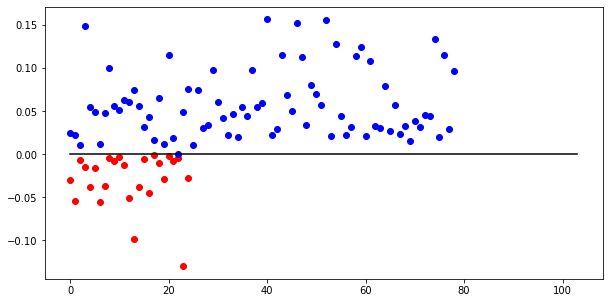

In [ ]:
import matplotlib.pyplot as plt
# Tracage du graphique des stabilitées
print(perceptron_stability(X_test,y_test,weights ))
stabilities = perceptron_stability(X_test,y_test,weights )
print(len([x for x in stabilities if x < 0]))
fig = plt.figure(figsize = (10, 5))

plt.scatter([i for i in range(len([x for x in stabilities if x < 0]))], [x for x in stabilities if x < 0], color='red')
plt.scatter([i for i in range(len([x for x in stabilities if x > 0]))], [x for x in stabilities if x > 0], color='blue')
plt.plot([i for i in range(len(stabilities))], [0 for i in range(len(stabilities))] , color='black')

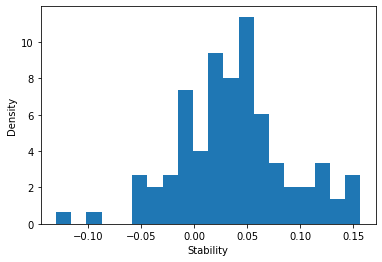

In [ ]:


# Tracer le graphique de stabilité 
plt.hist(stabilities, bins=20, density=True)
plt.xlabel('Stability')
plt.ylabel('Density')
plt.show()

# Apprentissage sur le "test" et teste sur l'ensemble de "train"

In [ ]:
# Apprentissage sur le "test"

weights = perceptron_training(X_test, y_test, 0.5)
print(weights)

[-1.60000e+01  6.53590e+00 -9.71200e+00 -1.04907e+01  8.10300e-01
 -6.88600e-01 -3.03922e+01 -4.11110e+01 -1.09807e+01  2.83510e+01
  6.15510e+00  3.84440e+01  3.00299e+01  7.20610e+00 -1.14930e+00
 -1.67055e+01  1.68929e+01  2.07440e+00 -2.27381e+01  1.73780e+00
  7.70790e+00  5.00870e+00  4.49400e+00  1.07131e+01  1.35888e+01
 -1.25685e+01 -1.38336e+01  2.03720e+00  5.11530e+00 -5.87060e+00
  4.95660e+00 -7.83990e+00 -1.63410e+00  2.78700e+00 -2.41648e+01
  1.87566e+01 -7.76490e+00 -3.56977e+01 -7.00100e-01  2.75652e+01
 -2.12953e+01  1.84187e+01  4.89840e+00  2.38943e+01  2.84341e+01
  8.52600e+00  4.92480e+00  1.40814e+01  1.06791e+01  6.59000e-01
 -5.78400e-01  7.05570e+00  4.93870e+00  1.35210e+00  2.95400e-01
  2.35200e-01  2.79560e+00  1.75240e+00  9.88200e-01  4.96590e+00
 -1.21000e-02]


In [ ]:
# Erreurs d'apprentissage et de généralisation

Ea = perceptron_test(X_test, y_test, weights)
Eg = perceptron_test(X, y, weights)
print(Ea)
print(Eg)

0
29


In [ ]:
# Stabilité sur les données de test ( ensemble d'entrainement )
print(perceptron_stability(X,y,weights ))
stabilities2 = perceptron_stability(X,y,weights )
print(len([x for x in stabilities2 if x < 0]))

[0.06743854607985274, 0.047615240203304966, -0.028392076991455673, -0.0005411816901992458, 0.1092950501369432, 0.2692509273186464, -4.2480049257098495e-05, 0.01922753170230682, -0.15023750671358022, 0.2077959690598923, 0.06853992902953508, -0.02008721048988578, 0.0022187524412151825, 0.14856448948052423, -0.2284570734289486, 0.06092598712649443, 0.17233984531041305, 0.11203090490911372, 0.24173667729668058, 0.09155916720917386, 0.0859031776607272, 0.38421753141531756, 0.1785376527589327, -0.060816622070578724, -0.07697369069818209, 0.035024883630676386, 0.03353269476008699, 0.4489869052878224, 0.020053139144296187, 0.051235759254611435, -0.19764251065486102, 0.01842872528174, 0.21839919143004094, 0.03429209811329263, 0.06889877877874948, 0.17915134144465755, 0.019252364734588308, -0.013228517780059484, 0.2628007273988049, 0.002699634010048125, -0.2966314878686875, 0.17386943250490283, 0.014436892996568727, 0.04170665532308206, -0.3066707365955236, 0.11499639268398988, 0.044579224473466

# Partie II, Algorithme d'apprentissage Pocket

In [ ]:
#Fonction pour intitialiser les poids en fonction de Hebb
def hebb_init(X, t):
    n_features = X.shape[1]
    n_samples = X.shape[0]
    w = np.zeros(n_features)
    for i in range(n_samples):
        x = X[i]
        y = t[i]
        w += x * y
    return w

# Cette fonction prend un booleen pour specifier si on veut initialiser les poids avec la methode de Hebb
def pocket_training(X, t,lr, max_errors, init_hebb=False):
  iter = 0
 
  # Initialisation de Hebb ou Aléatoire en fonction de la variable init_hebb

  if init_hebb:
    w_pocket = hebb_init(X,t)
  else:
    w_pocket = np.random.uniform(0, 0, size=(X.shape[1],))
  print(w_pocket) 
  w_best = np.zeros(X.shape[1])
  error_best = len(t)
  y = [0 for i in range(len(t))]
  iter = 0
  while not all(y[i] == t[i] for i in range(len(t))):
    iter = iter + 1
    error = 0
    for i in range(len(X)):
      sample = X[i] 
      value = w_pocket @ sample
      y[i] = signe(value)
      if y[i] != t[i]:
        w_pocket += lr * (t[i] - y[i]) * sample
        error += 1
  
    # sauvegarde du meilleur resultat a la fin d'une iteration
    if error < error_best:
      w_best = w_pocket.copy()
      error_best = error
    
    # Stop de l'apprentissage en fonction d'un nombre d'erreurs autorisées
    if error_best <= max_errors:
      break
  return w_pocket

In [ ]:
# Apprentissage sur l'ensemble de "train"
pocketW = pocket_training(X, y, 0.001, 8, True)

[-6.00000e+00  3.99500e-01  6.88400e-01  5.90800e-01  1.02930e+00
  1.08770e+00  3.66900e-01  7.87000e-02 -1.05000e-01  1.45720e+00
  1.95770e+00  2.50780e+00  2.66180e+00  2.56090e+00  1.15460e+00
 -8.56500e-01 -3.41260e+00 -3.68100e+00 -3.10230e+00 -8.32500e-01
 -1.73700e-01  3.33800e-01  2.26400e-01 -1.17980e+00 -1.85220e+00
 -2.66150e+00 -2.30920e+00 -1.11900e+00 -8.62800e-01 -1.35940e+00
 -2.13850e+00 -4.29680e+00 -3.63330e+00 -5.04920e+00 -7.43640e+00
 -9.54810e+00 -1.05443e+01 -8.22550e+00 -3.69860e+00 -1.98500e+00
 -3.29510e+00 -1.48960e+00  5.10000e-03  4.72300e-01  1.21940e+00
  3.11120e+00  2.65740e+00  2.08990e+00  1.65250e+00  1.16620e+00
  9.88000e-02  2.14100e-01  1.73800e-01  4.00000e-04  3.94000e-02
 -1.18000e-02  6.00000e-04 -6.10000e-02  6.50000e-02 -5.00000e-04
 -1.87000e-02]


In [ ]:
# Test de la generalisation sur l'ensemble de "test"
pocket_Ea = perceptron_test(X, y, pocketW)
pocket_Eg = perceptron_test(X_test, y_test, pocketW)
print(pocket_Ea)
print(pocket_Eg)

12
24


In [ ]:
#Apprentissage sur l'ensemble de test
pocketW = pocket_training(X_test, y_test, 0.001, 8, True)

[20.      1.302   1.4276  1.5519  2.1395  2.521   2.7163  3.0936  5.3296
  8.9134 10.4512 12.6885 12.216  10.3942  8.3528  7.777   9.2692  9.2881
 10.2259 15.2815 20.243  21.1503 19.1806 16.8366 14.9347 13.4006 13.4856
 13.7462 14.6296 12.1708 10.4643  6.4539  7.3397  6.3077  4.8469  2.8301
  1.2148  2.9353  6.6669  8.8917  6.3231  6.281   8.9263  9.715   9.3326
 10.3045  8.0657  5.0555  3.8831  2.1758  0.697   0.7398  0.5898  0.3569
  0.3899  0.2822  0.2681  0.1716  0.293   0.2791  0.2036]


In [ ]:
# Test de la generalisation sur l'ensemble de "Train"
pocket_Ea = perceptron_test(X_test, y_test, pocketW)
pocket_Eg = perceptron_test(X, y, pocketW)
print(pocket_Ea)
print(pocket_Eg)

10
29


# Partie 3; Apprentissage sur « train + test »

In [ ]:
test_data = test_data[:,1:]
train_data = train_data[:,1:]
all_data = np.concatenate((train_data, test_data), axis=0)


all_data = np.hstack((np.ones((len(all_data),1),dtype=float), all_data))
X_all_train = all_data[:, 0:(all_data.shape[1]-1)]

# Selection des labels
y_all_train = all_data[:, -1]



In [ ]:
W = pocket_training(X_all_train,y_all_train, 0.5, 8, False)
print(W)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ -79.      145.1217  -24.5191 -274.6785  132.9725  -55.4121   84.3985
  -92.3059 -110.9087  145.1383  -74.7851  102.3011  117.2315  -63.3528
  -16.4974   53.1187  -74.6675  -60.5422   78.7351  -48.064   107.677
 -141.0971  190.1795 -141.8579  161.2268  -84.4023   -1.4776   35.1943
  -30.4847   15.164    96.8971 -182.2842   79.6496   36.2904  -73.6202
   59.0502  -14.1737  -79.588    21.9408   72.7364 -103.6098    7.3676
   64.7951    2.373    22.813     1.8232   14.2925   25.4679  137.9532
  363.6212 -884.455   330.587   520.1526  267.4684  126.7907   54.1006
   59.8888  -89.7102  271.6236  176.9252   17.2895]


In [ ]:
Ea = perceptron_test(X_all_train, y_all_train, W)
print(Ea)

38


In [ ]:
#Si l'algorithme converge, cela signifie que les données sont linéairement séparables.
def is_linearly_separable(X, y):
    # Entraînement du perceptron
    w = W
    # Vérification si l'algorithme a convergé
    y_pred = np.sign(np.dot(X, w))
    return np.array_equal(y, y_pred)

print(is_linearly_separable(X_all_train,y_all_train))

False
